In [25]:
import torch.nn.functional as F
import copy
import os
import torch
from torchinfo import summary
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import random
import torch.nn.functional as F
import joblib
#display_tree('./')

# 1 . load the function
### load_data
* input : pick
* output

### calibration_function
* input : pickle of data. 
* output : two figures(flag- digital signal,F/T, Pressure, TCP, sensors data)

### rawdataplot
* input : pickle of data. 
* output : two figures(flag- digital signal,F/T, Pressure, TCP, sensors data)

### rmse
* input
* output

### plot_prediction
* input
* output


### plot_loss_curves
* input
* output

In [2]:
#P_Sensor_col=Total_dataset.columns[9:21]
def load_data(path):
    Columns=['Flag',
             'Force_X','Force_Y','Force_Z','Torque_X','Torque_Y','Torque_Z',
             'Input_P_1','Input_P_2',
             'TCP_X','TCP_Y','TCP_Z',
             'Sensor_P_1_1','Sensor_P_1_2','Sensor_P_1_3','Sensor_P_1_4',
             'Sensor_P_1_5','Sensor_P_1_6','Sensor_P_1_7','Sensor_P_1_8',
             'Sensor_P_1_9','Sensor_P_1_10','Sensor_P_1_11','Sensor_P_1_12',
             'Sensor_S_1',
             'Sensor_P_2_1','Sensor_P_2_2','Sensor_P_2_3','Sensor_P_2_4',
             'Sensor_P_2_5','Sensor_P_2_6','Sensor_P_2_7','Sensor_P_2_8',
             'Sensor_P_2_9','Sensor_P_2_10','Sensor_P_2_11','Sensor_P_2_12',
             'Sensor_S_2',
             'num_finger','properties'   ]

    temp = pd.read_pickle(path) 
    #temp = pd.read_pickle("./pickle/hal.pkl") 
    temp1 = pd.DataFrame(temp[:].values,columns=Columns)
    Total_dataset=temp1

    Flag_col = pd.Index(['Flag'])
    For_col = pd.Index(['Force_X','Force_Y','Force_Z'])
    Input_P_col = pd.Index(['Input_P_1','Input_P_2'])
    TCP_col= pd.Index(['TCP_X','TCP_Y','TCP_Z'])

    right_finger_pressure1 = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                      'Sensor_P_1_3','Sensor_P_1_4',
                                      'Sensor_P_1_5','Sensor_P_1_6'])

    right_finger_pressure2 = pd.Index([ 'Sensor_P_1_7','Sensor_P_1_8',
                               'Sensor_P_1_9','Sensor_P_1_10',
                               'Sensor_P_1_11','Sensor_P_1_12'])
    right_finger_pressure=right_finger_pressure1.append(right_finger_pressure2)
    right_finger_strain = pd.Index([ 'Sensor_S_1' ])

    right_finger_sensor=right_finger_pressure.append(right_finger_strain)

    left_finger_pressure1 = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                             'Sensor_P_2_3','Sensor_P_2_4',
                             'Sensor_P_2_5','Sensor_P_2_6'])

    left_finger_pressure2 = pd.Index([ 'Sensor_P_2_7','Sensor_P_2_8',
                               'Sensor_P_2_9','Sensor_P_2_10',
                               'Sensor_P_2_11','Sensor_P_2_12'])
    left_finger_pressure=left_finger_pressure1.append(left_finger_pressure2)

    left_finger_strain = pd.Index([ 'Sensor_S_2' ])

    left_finger_sensor=left_finger_pressure.append(left_finger_strain)


    # Robot signal Calibration
    Cal_list_col=[For_col,TCP_col]
    Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]
    for i in range(len(Cal_list_col)):
        for j in range(len(Cal_list_col[i])):

            col_name=Cal_list_col[i][j]

            Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0]

    # Sensor signal
    Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]

    for i in range(len(Sensor_Cal_list_col)):
        for j in range(len(Sensor_Cal_list_col[i])):

            col_name=Sensor_Cal_list_col[i][j]

            Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0] +0*j
    A=pd.DataFrame(Total_dataset.query('Flag==True ').values,columns=Columns)
    return A
    '''
    for i in range(len(Cal_list_col)):
        for j in range(len(Cal_list_col[i])):

            col_name=Cal_list_col[i][j]

            Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0]

    # Sensor signal


    for i in range(len(Sensor_Cal_list_col)):
        for j in range(len(Sensor_Cal_list_col[i])):

            col_name=Sensor_Cal_list_col[i][j]

            Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0] +0*j

    '''
def calibration_function(tar:pd.DataFrame,Cal_list_col:list,Sensor_Cal_list_col:list  ):
    for i in range(len(Cal_list_col)):
        for j in range(len(Cal_list_col[i])):

            col_name=Cal_list_col[i][j]

            tar[col_name]=tar[col_name]-tar[col_name][0]

    # Sensor signal
    Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]

    for i in range(len(Sensor_Cal_list_col)):
        for j in range(len(Sensor_Cal_list_col[i])):

            col_name=Sensor_Cal_list_col[i][j]

            tar[col_name]=tar[col_name]-tar[col_name][0] +0*j
    return tar

def rawdataplot(Total_dataset):
    TEMP_Total_dataset=Total_dataset
    fig, axes = plt.subplots(nrows=4, ncols=1)
    TEMP_Total_dataset[Flag_col].replace({True: 1, False: 0}).plot(ax=axes[0],grid=True,title='Flag')

    TEMP_Total_dataset[For_col].plot(ax=axes[1],grid=True,title='F/T sensor(True value)')
    TEMP_Total_dataset[Input_P_col].plot(ax=axes[2],grid=True,title='Input pressure')
    TEMP_Total_dataset[TCP_col].plot(ax=axes[3],grid=True,title='TCP')
    plt.tight_layout()


    fig, axes = plt.subplots(nrows=3, ncols=1)
    TEMP_Total_dataset[right_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
    TEMP_Total_dataset[right_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
    TEMP_Total_dataset[right_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
    plt.tight_layout()
    fig, axes = plt.subplots(nrows=3, ncols=1)
    TEMP_Total_dataset[left_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
    TEMP_Total_dataset[left_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
    TEMP_Total_dataset[left_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
    plt.tight_layout()
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def plot_prediction(Pred_Values,True_Values,Lim_value, nbins=15,save_flag=False, save_name=None):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots Results

    Args: True value, Prediction results ,nbins and save flag and save name
        
    """
    xlim =Lim_value
    ylim =Lim_value
    
    
    fig,host=plt.subplots(nrows=2, ncols=3,figsize=(15,8))
    ax0 = host[0][0].twinx()
    
    host[0][0].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][0].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][0].plot(utils.extraction(True_Values,0),label='True',color='black')
    host[0][0].plot(utils.extraction(Pred_Values,0),label='Predict',color='red',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,0)) - np.array(utils.extraction(Pred_Values,0))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][0].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('X')
    
    
    ax0 = host[0][1].twinx()
    
    host[0][1].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][1].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][1].plot(utils.extraction(True_Values,1),label='True',color='black')
    host[0][1].plot(utils.extraction(Pred_Values,1),label='Predict',color='blue',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,1)) - np.array(utils.extraction(Pred_Values,1))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][1].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Y')
    
    ax0 = host[0][2].twinx()
    
    host[0][2].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][2].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][2].plot(utils.extraction(True_Values,2),label='True',color='black')
    host[0][2].plot(utils.extraction(Pred_Values,2),label='Predict',color='orange',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,2))),len(np.array(utils.extraction(True_Values,2))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,2)) - np.array(utils.extraction(Pred_Values,2))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][2].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Z')
   

    
    #plt.tight_layout(pad=3)
    

    
    #plt.show()
    # For 


    #plt.figure(figsize=(12,3))
    
    y = utils.extraction(Pred_Values,0)
    x = utils.extraction(True_Values,0)
    host[1][0].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][0].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][0].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('X')

    
    y = utils.extraction(Pred_Values,1)
    x = utils.extraction(True_Values,1)
    host[1][1].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][1].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][1].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Y')


    
    y = utils.extraction(Pred_Values,2)
    x = utils.extraction(True_Values,2)
    host[1][2].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet,range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][2].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][2].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Z')

   
    fig.suptitle(save_name)
    plt.tight_layout(pad=1)
    plt.show()
    if save_flag==True:
        fig.savefig(save_name)
    
def plot_loss_curves(results_bunch,single_flag=None,save_flag=False, save_name=None):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
   # Setup a plot 
    plt.figure(figsize=(10, 5))
    if single_flag==None:
        for i in range(len(results_bunch)):
            results=results_bunch[i]

            # Get the loss values of the results dictionary (training and test)
            loss = results['train_loss']
            test_loss = results['test_loss']

            # Get the accuracy values of the results dictionary (training and test)


            # Figure out how many epochs there were
            epochs = range(len(results['train_loss']))



            # Plot loss
            plt.subplot(1, 2, 1)
            plt.plot(epochs, loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Train_Loss')
                plt.xlabel('Epochs')
                plt.legend()


            plt.subplot(1, 2, 2)
            plt.plot(epochs, test_loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Test_Loss')
                plt.xlabel('Epochs')
                plt.legend()
                
                
    else:
        results=results_bunch
         # Get the loss values of the results dictionary (training and test)
        loss = results['train_loss']
        test_loss = results['test_loss']

        # Get the accuracy values of the results dictionary (training and test)


        # Figure out how many epochs there were
        epochs = range(len(results['train_loss']))



        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, label='con ')

        plt.title('Train_Loss')
        plt.xlabel('Epochs')
        plt.legend()


        plt.subplot(1, 2, 2)
        plt.plot(epochs, test_loss, label='con ')
        
        plt.title('Test_Loss')
        plt.xlabel('Epochs')
        plt.legend()

    plt.suptitle(save_name)
    plt.tight_layout(pad=1)
    
    if save_flag==True:
        plt.savefig(save_name)
    plt.show()

    

# 2 . Model defining

In [44]:
from torch import nn 
class MLP(nn.Module):
    def __init__(self,input_dim : int,layer_dim:int, hidden_dim:int,output_dim:int, dropout_prob:float,activation_function:torch.nn):
        super(MLP, self).__init__()
        self.activation_function = activation_function
        layers=[nn.Linear(input_dim, hidden_dim),self.activation_function,nn.Dropout(p=dropout_prob)]
        for i in range(layer_dim):
            layers+=[nn.Linear(hidden_dim,hidden_dim),self.activation_function,nn.Dropout(p=dropout_prob)]
            
        layers+=[nn.Linear(hidden_dim,output_dim)]
        self.mlp = nn.Sequential(*layers)
    def forward(self, x):
        out = self.mlp(x)
        return torch.squeeze(out,1)

class LSTMModel_V0(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V1, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.Relu=nn.leaky_relu()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.Relu(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out
class LSTMModel_V1(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V1, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.Relu=nn.ReLU()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.Relu(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


class LSTMModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(LSTMModel_V2, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob,
        device=device)
        
        self.act_F=nn.Tanh()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim,device=x.device).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim,device=x.device).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.act_F(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


class LSTMModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V3, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.act_F=nn.Sigmoid()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.act_F(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

class RNNModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(RNNModel_V3, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.RNN(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob,device=device)
        
        self.act_F=nn.Sigmoid()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out    
    
class RNNModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(RNNModel_V2, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.RNN(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob,device=device)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out    
    

class GRUModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(GRUModel_V3, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Sigmoid()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out  
    
class GRUModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(GRUModel_V2, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob,device=device)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out
    
class GRUModel_V0(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(GRUModel_V0, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        #out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out  
'''
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.hidden_size = hidden_size
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Parameter(torch.rand(hidden_size))
        self.v.data.normal_(mean=0, std=1. / hidden_size**0.5)

    def forward(self, hidden, encoder_outputs):
        # hidden: (batch_size, hidden_size)
        # encoder_outputs: (batch_size, seq_len, hidden_size)

        seq_len = encoder_outputs.size(1)

        # Repeat the hidden state for each time step in the sequence
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)

        # Concatenate the hidden state and encoder outputs
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))

        # Compute attention scores
        energy = energy.permute(0, 2, 1)  # (batch_size, hidden_size, seq_len)
        v = self.v.unsqueeze(0).unsqueeze(0).repeat(hidden.size(0), 1, 1)  # (batch_size, 1, hidden_size)
        attention_scores = torch.bmm(v, energy).squeeze(1)  # (batch_size, seq_len)

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=1).unsqueeze(2)

        # Calculate the weighted sum of encoder outputs
        context = torch.bmm(attention_weights.permute(0, 2, 1), encoder_outputs)

        return context, attention_weights

class LSTMWithAttention(nn.Module):
  # def __init__(self, input_size, hidden_size, output_size, num_layers=1):
    def __init__(self, input_size : int, hidden_size:int, num_layers:int, output_size:int, dropout_prob:float):
        super(LSTMWithAttention, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.attention = Attention(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # Attention mechanism
        context, attention_weights = self.attention(h_n[-1], lstm_out)

        # Concatenate the context vector with the hidden state
        lstm_out = torch.cat((context, h_n[-1]), dim=1)

        # Fully connected layer
        output = self.fc(lstm_out)

        return output ,attention_weights
'''
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(AttentionLSTM, self).__init__()
        self.hidden_size = hidden_size

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Attention mechanism
        self.attention = nn.Linear(hidden_size * 2, 1)

        # Fully connected layer for regression
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layer
        lstm_out, (h_n, _) = self.lstm(x)

        # Attention mechanism
        attention_weights = F.softmax(self.attention(torch.cat([lstm_out, h_n.repeat(lstm_out.size(1), 1, 1)], dim=2)), dim=1)
        context = torch.bmm(attention_weights.permute(0, 2, 1), lstm_out).squeeze(1)

        # Fully connected layer
        output = self.fc(context)

        return output, attention_weights
    
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, layer_dim,output_size,dropout_prob):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.drop=nn.Dropout(p=dropout_prob)
        
        layers=[]
        for i in range(layer_dim):
            layers+=[self.drop,nn.Linear(hidden_size,hidden_size),self.relu]
        self.extra = nn.Sequential(*layers)

        
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        a=layer_dim

    def forward(self, x):
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.extra(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return torch.squeeze(x,1)
    
'''
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return torch.squeeze(x,1)
'''    

class Multi_2_nn(nn.Module):
    def __init__(self, input_dim1 : int,input_dim2 : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(Multi_2_nn, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.lstm1 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm2 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        
    def forward(self, x1,x2):
        # LSTM layer
        lstm_out1, (h_n1, _) = self.lstm1(x1)
        lstm_out2, (h_n2, _) = self.lstm2(x2)
        out = torch.cat((lstm_out1[:, -1, :], lstm_out2[:, -1, :]), dim=1) 

        # Fully connected layer
        output = self.fc(out)

        return output
class Multi_3_nn(nn.Module): # Pressure, stain, Given pressure
    def __init__(self, input_dim1 : int,input_dim2 : int,input_dim3 ,hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(Multi_3_nn, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.lstm1 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm2 = nn.LSTM(input_dim2, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm3 = nn.LSTM(input_dim3, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim*3, output_dim)
        
    def forward(self, x1,x2,x3):
        # LSTM layer
        lstm_out1, (h_n1, _) = self.lstm1(x1)
        lstm_out2, (h_n2, _) = self.lstm2(x2)
        lstm_out3, (h_n3, _) = self.lstm3(x3)
        out = torch.cat((lstm_out1[:, -1, :], lstm_out2[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out3[:, -1, :]), dim=1) 
        # Fully connected layer
        output = self.fc(out)

        return output
    
class Multi_5_nn(nn.Module): # Pressure, stain, Given pressure
    def __init__(self, input_dim1 : int,input_dim2 : int,input_dim3 :int ,input_dim4 :int,input_dim5 :int,hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(Multi_5_nn, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.lstm1 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm2 = nn.LSTM(input_dim2, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm3 = nn.LSTM(input_dim3, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm4 = nn.LSTM(input_dim4, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm5 = nn.LSTM(input_dim5, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim*5, output_dim)
        
    def forward(self, x1,x2,x3,x4,x5):
        # LSTM layer
        lstm_out1, (h_n1, _) = self.lstm1(x1)
        lstm_out2, (h_n2, _) = self.lstm2(x2)
        lstm_out3, (h_n3, _) = self.lstm3(x3)
        lstm_out4, (h_n4, _) = self.lstm4(x4)
        lstm_out5, (h_n5, _) = self.lstm5(x5)
        out = torch.cat((lstm_out1[:, -1, :], lstm_out2[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out3[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out4[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out5[:, -1, :]), dim=1) 
        # Fully connected layer
        output = self.fc(out)

        return output

In [45]:
model = SimpleNN(input_size=Input_dim,
                                hidden_size=HIDDEN_UNITS,
                                layer_dim = LAYER_DIM,
                                output_size=Output_dim,
                                dropout_prob=0.2  
                                )

In [46]:
model

SimpleNN(
  (fc1): Linear(in_features=26, out_features=1, bias=True)
  (relu): ReLU()
  (drop): Dropout(p=0.2, inplace=False)
  (extra): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=1, out_features=1, bias=True)
    (2): ReLU()
  )
  (fc2): Linear(in_features=1, out_features=3, bias=True)
  (sigmoid): Sigmoid()
)

# 3. Loading the data

In [13]:
Flag_col = pd.Index(['Flag'])
For_col = pd.Index(['Force_X','Force_Y','Force_Z'])
Input_P_col = pd.Index(['Input_P_1','Input_P_2'])
TCP_col= pd.Index(['TCP_X','TCP_Y','TCP_Z'])
# Right finger
right_finger_pressure1 = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                      'Sensor_P_1_3','Sensor_P_1_4',
                                      'Sensor_P_1_5','Sensor_P_1_6'])

right_finger_pressure2 = pd.Index([ 'Sensor_P_1_7','Sensor_P_1_8',
                                   'Sensor_P_1_9','Sensor_P_1_10',
                                   'Sensor_P_1_11','Sensor_P_1_12'])
right_finger_pressure= pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                   'Sensor_P_1_3','Sensor_P_1_4',
                                   'Sensor_P_1_5','Sensor_P_1_6',
                                   'Sensor_P_1_7','Sensor_P_1_8',
                                   'Sensor_P_1_9','Sensor_P_1_10',
                                   'Sensor_P_1_11','Sensor_P_1_12'])
right_finger_strain = pd.Index([ 'Sensor_S_1' ])
right_finger_sensor=right_finger_pressure.append(right_finger_strain)

# Left finger
left_finger_pressure1 = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                                     'Sensor_P_2_3','Sensor_P_2_4',
                                     'Sensor_P_2_5','Sensor_P_2_6'])

left_finger_pressure2 = pd.Index([ 'Sensor_P_2_7','Sensor_P_2_8',
                                   'Sensor_P_2_9','Sensor_P_2_10',
                                   'Sensor_P_2_11','Sensor_P_2_12'])
left_finger_pressure = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                                 'Sensor_P_2_3','Sensor_P_2_4',
                                 'Sensor_P_2_5','Sensor_P_2_6',
                                 'Sensor_P_2_7','Sensor_P_2_8',
                                 'Sensor_P_2_9','Sensor_P_2_10',
                                 'Sensor_P_2_11','Sensor_P_2_12'])
left_finger_strain = pd.Index([ 'Sensor_S_2' ])
left_finger_sensor=left_finger_pressure.append(left_finger_strain)


One_entire_condition=right_finger_sensor.append(left_finger_sensor)
TCP_condition=One_entire_condition.append(TCP_col)
Columns=['Flag',
         'Force_X','Force_Y','Force_Z','Torque_X','Torque_Y','Torque_Z',
         'Input_P_1','Input_P_2',
         'TCP_X','TCP_Y','TCP_Z',
         'Sensor_P_1_1','Sensor_P_1_2','Sensor_P_1_3','Sensor_P_1_4',
         'Sensor_P_1_5','Sensor_P_1_6','Sensor_P_1_7','Sensor_P_1_8',
         'Sensor_P_1_9','Sensor_P_1_10','Sensor_P_1_11','Sensor_P_1_12',
         'Sensor_S_1',
         'Sensor_P_2_1','Sensor_P_2_2','Sensor_P_2_3','Sensor_P_2_4',
         'Sensor_P_2_5','Sensor_P_2_6','Sensor_P_2_7','Sensor_P_2_8',
         'Sensor_P_2_9','Sensor_P_2_10','Sensor_P_2_11','Sensor_P_2_12',
         'Sensor_S_2',
         'num_finger','properties'   ]

In [10]:
# load the data
cir=load_data("./pickle/dec_13/cir.pkl")
cv=load_data("./pickle/dec_13/cv.pkl")
sqr=load_data("./pickle/dec_13/sqr.pkl")
nonc=load_data("./pickle/dec_13/nonc.pkl")

Cal_list_col=[For_col,TCP_col]
Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]

In [11]:
# Calibrate each file
cir1=calibration_function(pd.DataFrame(cir.query('properties=="1"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
cir2=calibration_function(pd.DataFrame(cir.query('properties=="2"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
cir3=calibration_function(pd.DataFrame(cir.query('properties=="3"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
cir4=calibration_function(pd.DataFrame(cir.query('properties=="4"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
cv1=calibration_function(pd.DataFrame(cv.query('properties=="1"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
cv2=calibration_function(pd.DataFrame(cv.query('properties=="2"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
cv3=calibration_function(pd.DataFrame(cv.query('properties=="3"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
cv4=calibration_function(pd.DataFrame(cv.query('properties=="4"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)

sqr1=calibration_function(pd.DataFrame(sqr.query('properties=="1"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
sqr2=calibration_function(pd.DataFrame(sqr.query('properties=="2"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
sqr3=calibration_function(pd.DataFrame(sqr.query('properties=="3"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
sqr4=calibration_function(pd.DataFrame(sqr.query('properties=="4"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)

nonc1=calibration_function(pd.DataFrame(nonc.query('properties=="1"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
nonc2=calibration_function(pd.DataFrame(nonc.query('properties=="2"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
nonc3=calibration_function(pd.DataFrame(nonc.query('properties=="3"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
nonc4=calibration_function(pd.DataFrame(nonc.query('properties=="4"  ').values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)

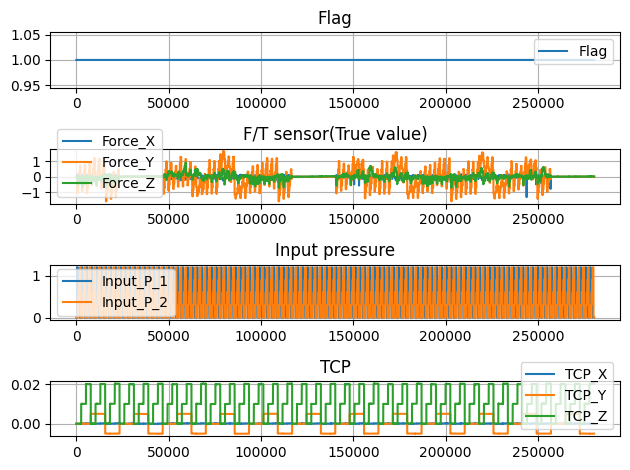

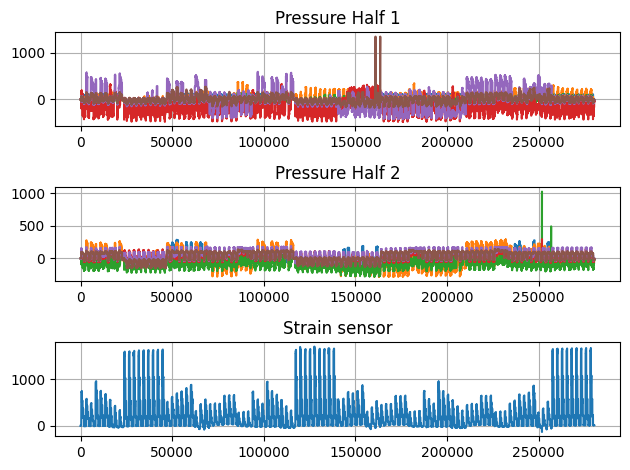

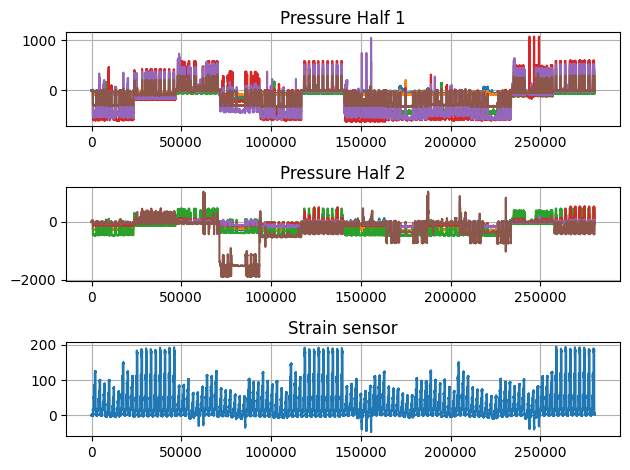

In [26]:
rawdataplot(train_d)

In [15]:
total=pd.concat([cir1, nonc1,cv1,sqr1,cir2,nonc2,cv2,sqr2,cir3,sqr3,cv3,nonc3,cir4,cv4,sqr4,nonc4],ignore_index=False)

# 3. Training
- training different conditions of the model
- tunable parameter : number of layer, sequential length, num_epochs, batchsize, model, hidden node, learning late, dropout_prob.
### save file 
- model  : address "models/today_date/model"
- scaler : address "scaler/today_date/model"

In [34]:
model

LSTMModel_V2(
  (lstm): LSTM(26, 2, num_layers=2, batch_first=True, dropout=0.2)
  (act_F): Tanh()
  (fc): Linear(in_features=2, out_features=3, bias=True)
)

In [ ]:
duration_time=[]
loss_results=[]
final_results=[]
result_rmse=[]

today_date='dec_22' # folder name
dscrpt='' # any description



# Hyper parameters
LAYER_DIM1=[2,2,5,10] # 
Sequential_L1=[1,2,5,10] #
NUM_EPOCHS = 100
BATCH_SIZE = 32
HIDDEN_UNITS1 = [1,2,5,10]
LEARNING_RATE = 0.001
Dropout_prob=0.2
#model_name=['mpl','lstm','gru','rnn']
model_name=['mpl','lstm','gru','rnn']




device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_d= pd.DataFrame(total.query('properties<"4"  ').values,columns=Columns)
test_d= pd.DataFrame(total.query('properties=="4" ').values,columns=Columns)

for i in range(len(LAYER_DIM1)):
    for j in range(len(Sequential_L1)):
        for k in range(len(HIDDEN_UNITS1)):
            for l in range(len(model_name)):
                HIDDEN_UNITS=HIDDEN_UNITS1[k]
                LAYER_DIM=LAYER_DIM1[i]
                Sequential_L=Sequential_L1[j]
                name=model_name[l]+today_date+"LD_"+str(LAYER_DIM)+"SQ_"+str(Sequential_L)+"HU_"+str(HIDDEN_UNITS)+dscrpt
                prediction_figure_name='./figure/'+today_date+'/predict_'+name+'.png'
                loss_function_figure_name='./figure/'+today_date+'/loss_'+name+'.png'
                
                
                
                Y_tr=np.array(train_d.filter(items=For_col))
                X_tr=np.array(train_d.filter(items=One_entire_condition)) ## important part

                #X_tr_scaler = sklearn.preprocessing.StandardScaler()
                #Y_tr_scaler = sklearn.preprocessing.StandardScaler()
                X_tr_scaler = sklearn.preprocessing.RobustScaler()
                Y_tr_scaler = sklearn.preprocessing.RobustScaler()
                #X_tr_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))
                #Y_tr_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))
                #X_scaler = sklearn.preprocessing.MinMaxScaler()
                #Y_scaler = sklearn.preprocessing.MinMaxScaler()



                Y_te=np.array(test_d.filter(items=For_col))
                X_te=np.array(test_d.filter(items=One_entire_condition)) ## important part



                X_test=torch.FloatTensor(X_tr_scaler.fit_transform(X_te))
                Y_test=torch.FloatTensor(Y_tr_scaler.fit_transform(Y_te))



                X_train=torch.FloatTensor(X_tr_scaler.fit_transform(X_tr))
                Y_train=torch.FloatTensor(Y_tr_scaler.fit_transform(Y_tr))



                
               

                train_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)
                test_dataset=DataLoader(utils.Data(X_test,Y_test,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)


                Input_dim=len(X_train[0])
                Output_dim=len(Y_train[0])
    

                if model_name[l]=='mpl':
                    if Sequential_L!=1:
                        continue
                    model = SimpleNN(input_size=Input_dim,
                                hidden_size=HIDDEN_UNITS,
                                layer_dim = LAYER_DIM,
                                output_size=Output_dim,
                                dropout_prob=0.2  
                                )
                    '''
                    model = MLP(input_dim=Input_dim,
                                layer_dim=LAYER_DIM, 
                                hidden_dim=HIDDEN_UNITS,
                                output_dim=Output_dim, 
                                dropout_prob=0.2,
                                activation_function=nn.ReLU())'''
                elif model_name[l]=='lstm':
                    model = LSTMModel_V2(    input_dim = Input_dim,
                                        hidden_dim=HIDDEN_UNITS,
                                        layer_dim=LAYER_DIM,
                                        output_dim=Output_dim,
                                        dropout_prob=0.2,device=device)
                elif model_name[l]=='gru':
                    model = GRUModel_V2(    input_dim = Input_dim,
                                        hidden_dim=HIDDEN_UNITS,
                                        layer_dim=LAYER_DIM,
                                        output_dim=Output_dim,
                                        dropout_prob=0.2,device=device)
                elif model_name[l]=='rnn':
                    model = RNNModel_V2(    input_dim = Input_dim,
                                        hidden_dim=HIDDEN_UNITS,
                                        layer_dim=LAYER_DIM,
                                        output_dim=Output_dim,
                                        dropout_prob=0.2,device=device)
                

                model.to(device)


                # Set loss and optimizer
                loss_fn = torch.nn.MSELoss() ## change
                optimizer = torch.optim.Adam(model.parameters(), ## change
                                             lr=LEARNING_RATE)
                # Train
                #torchinfo.summary(model,(5,5,5))
                start_time = timer()
                results=engine.train(model=model,
                             train_dataloader=train_dataset,
                             test_dataloader=test_dataset,
                             loss_fn=loss_fn,
                             optimizer=optimizer,
                             epochs=NUM_EPOCHS,
                             device=device)
                end_time = timer()

                print(f'Time taken : {end_time-start_time}')
                loss_results.append(results)
                Pred_Values=Y_tr_scaler.inverse_transform(utils.predict(model,test_dataset,device).to('cpu'))
                True_Values=Y_tr_scaler.inverse_transform(Y_test)
                result_rmse.append( rmse(Pred_Values,True_Values))
                utils.save_model(model=model,
                                 target_dir="models/"+today_date,
                                 model_name=name+".pth")
                plot_prediction(Pred_Values,True_Values,2,save_flag=True,save_name=prediction_figure_name )
                plot_loss_curves(results,single_flag=True,save_flag=True, save_name=loss_function_figure_name)
                joblib.dump(X_tr_scaler, "scaler/"+today_date+"/X"+name+'.save') 
                joblib.dump(Y_tr_scaler, "scaler/"+today_date+"/Y"+name+'.save') 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2443 | test_loss: 2.6669 | 
Epoch: 6 | train_loss: 2.1759 | test_loss: 2.6222 | 
Epoch: 11 | train_loss: 2.1749 | test_loss: 2.6238 | 
Epoch: 16 | train_loss: 2.1739 | test_loss: 2.6176 | 
Epoch: 21 | train_loss: 2.1748 | test_loss: 2.6179 | 
Epoch: 26 | train_loss: 2.1732 | test_loss: 2.6143 | 
Epoch: 31 | train_loss: 2.1734 | test_loss: 2.6180 | 
Epoch: 36 | train_loss: 2.1740 | test_loss: 2.6198 | 
Epoch: 41 | train_loss: 2.1813 | test_loss: 2.6210 | 
Epoch: 46 | train_loss: 2.1820 | test_loss: 2.6182 | 
Epoch: 51 | train_loss: 2.1823 | test_loss: 2.6195 | 
Epoch: 56 | train_loss: 2.1784 | test_loss: 2.6394 | 
Epoch: 61 | train_loss: 2.1802 | test_loss: 2.6363 | 
Epoch: 66 | train_loss: 2.1720 | test_loss: 2.6436 | 
Epoch: 71 | train_loss: 2.1879 | test_loss: 2.6485 | 
Epoch: 76 | train_loss: 2.1772 | test_loss: 2.6523 | 
Epoch: 81 | train_loss: 2.1733 | test_loss: 2.6387 | 


In [18]:
Y

device(type='cuda', index=0)